<h1>Working with time Series</h1>

In [1]:
# Date and time comes in few flavors

## Time stamps reference particular moments in time

## Time intervals and periods reference a length of time between a particular beginning and end point.

## Time deltas or durations reference an exact length of time.

<h3>Dates and times in Python</h3>

In [2]:
# The python world has a number of available representations of dates, times, deltas and timespans. 

<h4>Native Python Dates and times: datetime and dateutil</h4>

In [3]:
# Building date using datetime type:

from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [4]:
# Parsing date using dateutil module
from dateutil import parser
date = parser. parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [5]:
# Print the day of the week
date.strftime("%A")

'Saturday'

<h4>Typed Arrays of Times: Numpy's datetime64</h4>

In [6]:
# The datetime64 dtype encodes dates as 64-bit integers and thus allows arrays of dates to be represented very
# compactly. The datetime64 requires a very specific input format:
import numpy as np

In [7]:
date = np.array("2015-07-04",dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [8]:
# Now vectorized operations can be performed on it
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [9]:
# datetime64 imposes a trade-off between time resolution and maximum time span
# day based datetime

np.datetime64("2015-07-07")

numpy.datetime64('2015-07-07')

In [10]:
# minute based datetime64
np.datetime64("2015-07-04 12:00")

numpy.datetime64('2015-07-04T12:00')

In [11]:
# Forcing a nano second based time
np.datetime64("2015-07-04 12:59:59.50","ns")

numpy.datetime64('2015-07-04T12:59:59.500000000')

<h4>Dates and times in pandas: Best of Both worlds</h4>

In [12]:
# From a group of these Timestamp objects, Pandas can construct a DateTimeIndex that can be used to index data
# in a Series or DataFrame. 

import pandas as pd

In [13]:
date = pd.to_datetime("4th of July, 2015")

In [14]:
date

Timestamp('2015-07-04 00:00:00')

In [15]:
date.strftime("%A")

'Saturday'

In [16]:
# We can do Numpy style vectorized operations directly on the same object:

date + pd.to_timedelta(np.arange(12),"D")

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

<h3>Pandas Time Series: Indexing By Time</h3>

In [17]:
# Where the Pandas time series tools really become useful is when you begin to index data by timestamps.

# We can construct a Series object that has time indexed data:

index = pd.DatetimeIndex(['2014-07-04', '2014-08-04','2015-07-04', '2015-08-04'])
data = pd.Series([0,1,2,3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [18]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [19]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

<h3>Pandas Time Series Data Structures</h3>

In [20]:
# For timestamps, Pandas provides the TimeStamp type

# For timeperiods, Pandas provides the Period type

# For time deltas or durations, Pandas provides the Timedelta type. 

In [21]:
# Passing a single date to pd.to_datetime() function can parse a wide variety of formats, it yields a Timestamp. 
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015','2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [22]:
# DatetimeIndex can be converted to period using to_period function with the addition of a frequency code. 

dates.to_period("D")

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [23]:
# A TimeDeltaIndex is created when one date is subtracted from other. 

dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

<h4>Regular Sequences: pd.date_range()</h4>

In [24]:
pd.date_range("2015-07-03","2015-07-10")

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [25]:
pd.date_range("2015-07-03", periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [26]:
pd.date_range("2015-07-03", periods=8,freq="H")

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [27]:
pd.period_range("2015-07",periods=8,freq="M")

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [28]:
pd.timedelta_range(0, periods=10, freq="H")

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

<h3>Frequencies and offsets</h3>

In [29]:
# Fundamental to the Pandas time series tools is the concept of a frequency or date offset. 

pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [30]:
from pandas.tseries.offsets import BDay
pd.date_range("2015-07-01", periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

<h3>Resampling, Windowing and Shifting</h3>

In [31]:
# The ability to use dates and timestamps as indices to intuitively organize data is an important piece of the 
# Pandas time series tools. 

In [32]:
from pandas_datareader import data

In [33]:
conda install pandas-datareader

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [35]:
from pandas_datareader import data as pdr
import yfinance as yfin

In [36]:
yfin.pdr_override()

In [37]:

goog = pdr.get_data_yahoo("GOOG",start="2004-01-01",end="2016-12-31")

[*********************100%***********************]  1 of 1 completed


In [38]:
goog.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [39]:
# We will use the closing price
goog = goog["Close"]

In [40]:
# We can visualize this using the plot():

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

<Axes: xlabel='Date'>

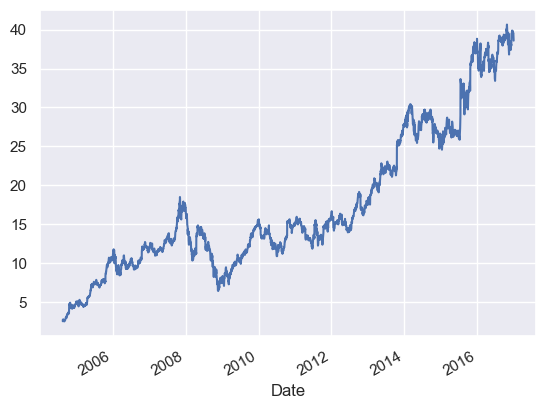

In [41]:
goog.plot()

<h4>Resampling and converting frequencies</h4>

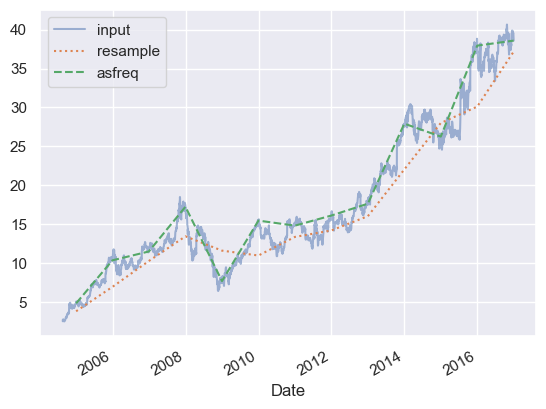

In [42]:
# Resampling at a higher or lower frequency can be done using resample() and asfreq() methods. 

# The primary difference between the two is that resample() is fundamentally data aggregation, while asfreq() is 
# fundamentally data selection. 

goog.plot(alpha=0.5, style="-")
goog.resample("BA").mean().plot(style=":")
goog.asfreq("BA").plot(style="--");
plt.legend(["input","resample","asfreq"], loc="upper left");

In [43]:
# Resample reports the average of the previous year, while asfreq reports the value at the end of the year. 

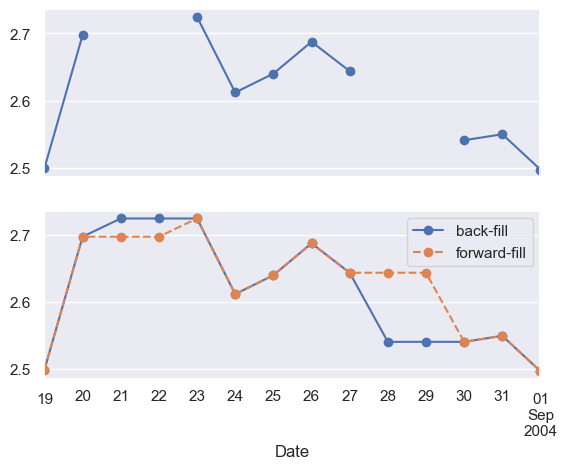

In [44]:
# Resample business data at a daily frequency

fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]
data.asfreq("D").plot(ax=ax[0],marker="o")
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

<h4>Time-shifts</h4>

/var/folders/c8/z4lh2j2s5kq5jvv28mrv0rw40000gn/T/ipykernel_48561/184731282.py:11: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  goog.tshift(900).plot(ax=ax[2])


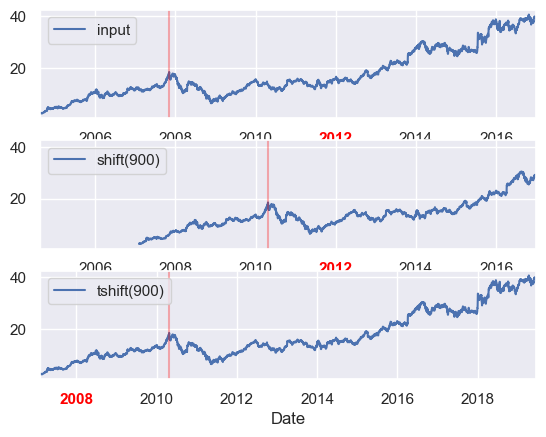

In [45]:
# Another common time series–specific operation is shifting of data in time. Pandas
# has two closely related methods for computing this: shift() and tshift().

fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

/var/folders/c8/z4lh2j2s5kq5jvv28mrv0rw40000gn/T/ipykernel_48561/2953241686.py:3: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ROI = 100 * (goog.tshift(-365) / goog - 1)


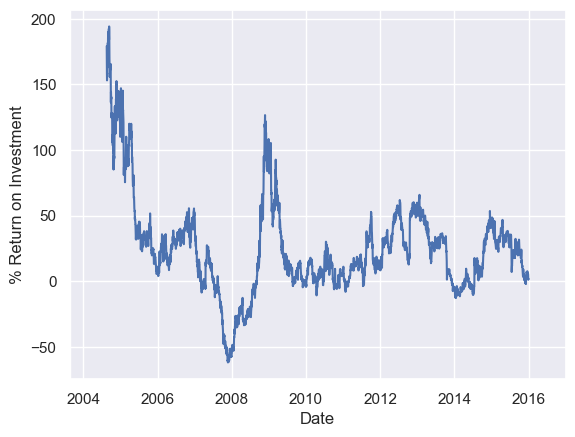

In [46]:
# Return on investment computation

ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel("% Return on Investment");

<h4>Rolling Window</h4>

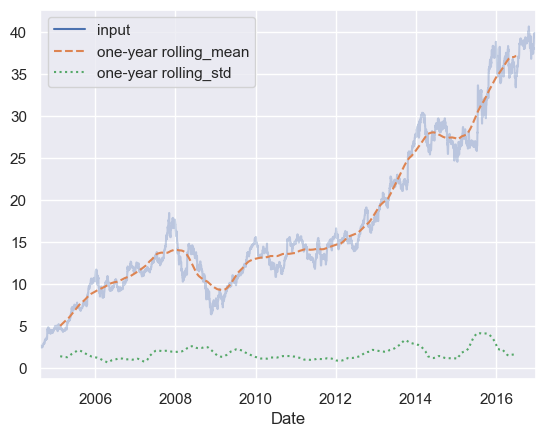

In [47]:
# Rolling statistics are a third type of time series specific operation implemented by Pandas. 

# This can be achieved via the rolling() attribute of Series and DataFrame objects. 

# One year centered rolling mean and standard deviation of the Google Stock prices. 

import numpy as np
import pandas as pd
rolling = goog.rolling(365, center = True)
data = pd.DataFrame({'input': goog,
'one-year rolling_mean': rolling.mean(),
'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

<h3>Example: Visualizing Seattle Bicycle Counts</h3>

In [48]:
# Download the data
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

zsh:1: no matches found: https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD


In [49]:
# Date as an index and dates to be automatically parsed
data = pd.read_csv("Fremont_Bridge_Bicycle_Counter.csv",index_col="Date",parse_dates=True)

In [50]:
data.head()

,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk"
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


In [51]:
data.columns = ["West","East","South"]
data["Total"] = data.eval("West + East")

In [52]:
data.dropna().describe()

,West,East,South,Total
count,91210.000000,91210.000000,91210.000000,91210.000000
mean,105.603859,47.193882,58.409977,152.797741
std,133.270779,60.779588,82.619206,189.959429
min,0.000000,0.000000,0.000000,0.000000
25%,13.000000,6.000000,7.000000,19.000000
50%,58.000000,26.000000,30.000000,85.000000
75%,142.000000,65.000000,75.000000,207.000000
max,1097.000000,698.000000,850.000000,1569.000000


<h4>Visualizing the Data</h4>

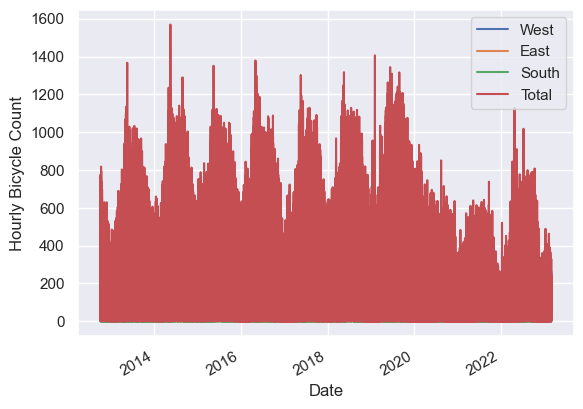

In [53]:
data.plot()
plt.ylabel("Hourly Bicycle Count");

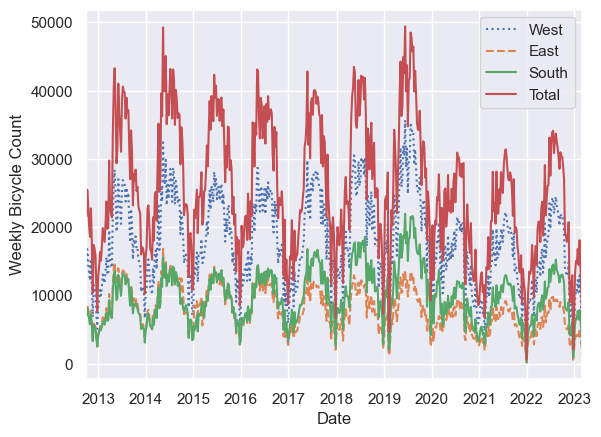

In [54]:
# Resampling by Week

weekly = data.resample("W").sum()
weekly.plot(style=[":","--","-"])
plt.ylabel("Weekly Bicycle Count");

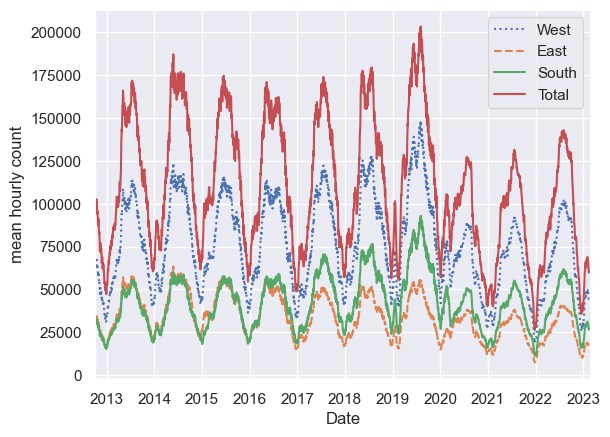

In [55]:
# Use of pd.rolling_mean() function

daily = data.resample("D").sum()
daily.rolling(30, center=True).sum().plot(style=[":","--","-"])
plt.ylabel("mean hourly count");

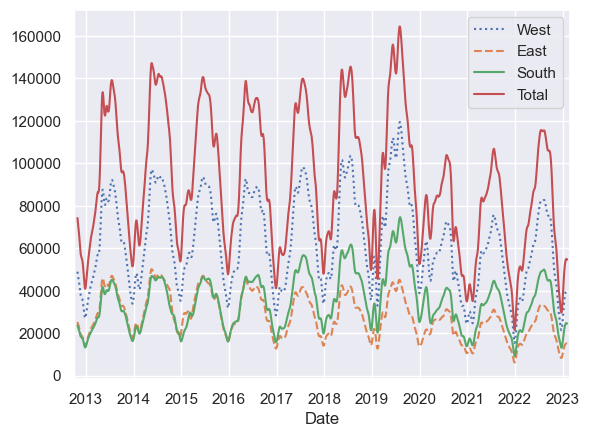

In [56]:
daily.rolling(50, center=True, win_type="gaussian").sum(std=10).plot(style=[":","--","-"]);

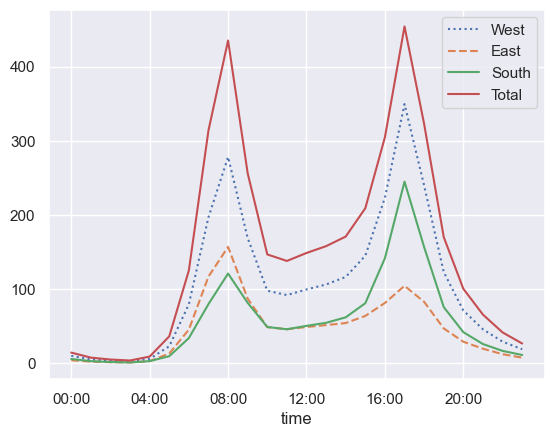

In [57]:
# Average Function of time of day

by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[":","--","-"]);

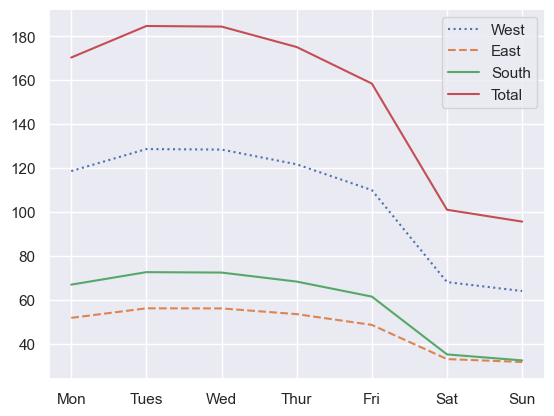

In [58]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ["Mon","Tues","Wed","Thur","Fri","Sat","Sun"]
by_weekday.plot(style=[":","--","-"]);

In [59]:
weekend = np.where(data.index.weekday < 5,"Weekday","Weekend")
by_time = data.groupby([weekend,data.index.time]).mean()

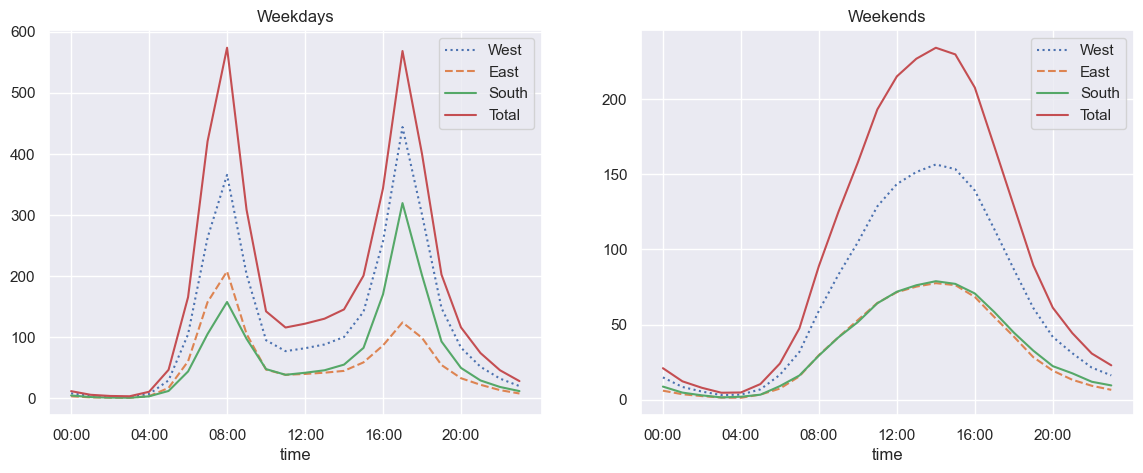

In [60]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
xticks=hourly_ticks, style=[':', '--', '-']);